# MNIST-Fashion using CNN
### Name: Tanmay Walke
### Date: 1 March 2025
### Class: TY-CSE(AI)
### Roll No.: 65

## Import Libraries

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Load Dataset

In [44]:
# Step 1: Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [45]:
# Step 2: Normalize the images to a range of [0, 1] by dividing by 255
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 3: Reshape the data to include a channel dimension (grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 4: One-hot encode the labels (for classification)
y_train = to_categorical(y_train, 10)  # One-hot encoding of labels
y_test = to_categorical(y_test, 10)    # One-hot encoding of labels

# Step 5: Check the shape of y_train and y_test
print(f"y_train shape: {y_train.shape}")  # Should be (60000, 10)
print(f"y_test shape: {y_test.shape}")    # Should be (10000, 10)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


# Relu & Softmax

In [46]:
# Step 6: Build the CNN model
model = models.Sequential([
    # First convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the 3D feature maps to 1D vector
    layers.Flatten(),
    
    # Fully connected layer with 128 neurons and ReLU activation
    layers.Dense(128, activation='relu'),
    
    # Output layer with 10 neurons for 10 classes (fashion categories) and softmax activation
    layers.Dense(10, activation='softmax')
])

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Leaky RELU

In [59]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU

# Step 6: Build the CNN model with Leaky ReLU
model = models.Sequential([
    # First convolutional layer with 32 filters, 3x3 kernel, and Leaky ReLU activation
    layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer with 64 filters, 3x3 kernel, and Leaky ReLU activation
    layers.Conv2D(64, (3, 3)),
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer with 128 filters, 3x3 kernel, and Leaky ReLU activation
    layers.Conv2D(128, (3, 3)),
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the 3D feature maps to 1D vector
    layers.Flatten(),
    
    # Fully connected layer with 128 neurons and Leaky ReLU activation
    layers.Dense(128),
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation
    
    # Output layer with 10 neurons for 10 classes (fashion categories) and softmax activation
    layers.Dense(10, activation='softmax')
])


In [61]:
# Step 7: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [62]:
# Step 8: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6952 - loss: 0.8248 - val_accuracy: 0.8295 - val_loss: 0.4672
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8512 - loss: 0.4041 - val_accuracy: 0.8635 - val_loss: 0.3876
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8736 - loss: 0.3408 - val_accuracy: 0.8697 - val_loss: 0.3574
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8909 - loss: 0.2972 - val_accuracy: 0.8791 - val_loss: 0.3336
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9005 - loss: 0.2721 - val_accuracy: 0.8852 - val_loss: 0.3165
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9105 - loss: 0.2443 - val_accuracy: 0.8902 - val_loss: 0.3108
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9166 - loss: 0.2271 - val_accuracy: 0.8914 - val_loss: 0.3007
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9230 - loss: 0.2058 - val_accuracy: 0.

In [55]:
# Print the training and validation accuracy for each epoch
for epoch in range(10):
    print(f"Epoch {epoch+1}:")
    print(f"  Training accuracy: {history.history['accuracy'][epoch]*100:.2f}%")
    print(f"  Validation accuracy: {history.history['val_accuracy'][epoch]*100:.2f}%")
    print("-" * 50)

Epoch 1:
  Training accuracy: 77.65%
  Validation accuracy: 82.69%
--------------------------------------------------
Epoch 2:
  Training accuracy: 84.92%
  Validation accuracy: 84.90%
--------------------------------------------------
Epoch 3:
  Training accuracy: 87.22%
  Validation accuracy: 87.13%
--------------------------------------------------
Epoch 4:
  Training accuracy: 88.51%
  Validation accuracy: 87.48%
--------------------------------------------------
Epoch 5:
  Training accuracy: 89.48%
  Validation accuracy: 88.56%
--------------------------------------------------
Epoch 6:
  Training accuracy: 90.53%
  Validation accuracy: 89.13%
--------------------------------------------------
Epoch 7:
  Training accuracy: 91.33%
  Validation accuracy: 89.71%
--------------------------------------------------
Epoch 8:
  Training accuracy: 91.81%
  Validation accuracy: 89.79%
--------------------------------------------------
Epoch 9:
  Training accuracy: 92.73%
  Validation accura

In [63]:
# Step 9: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8941 - loss: 0.3329
Test accuracy: 89.50%


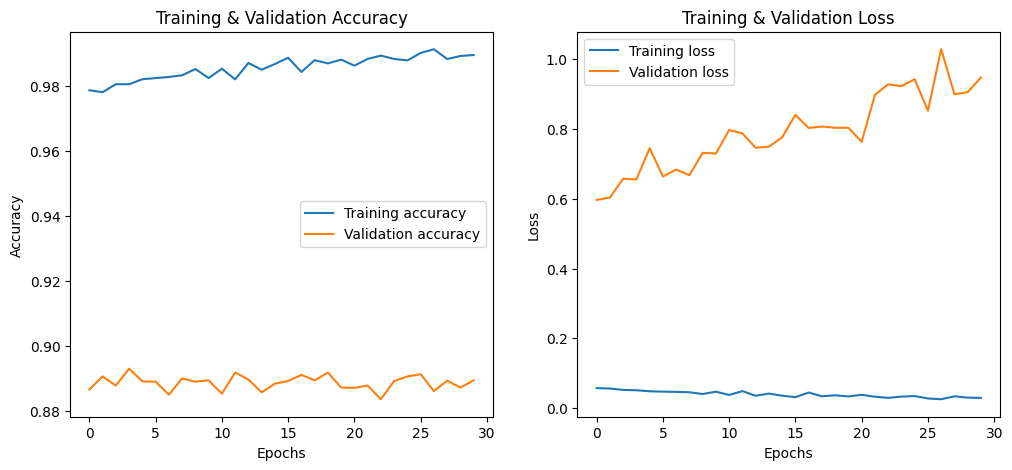

In [35]:

# Step 9: Plot the training & validation accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


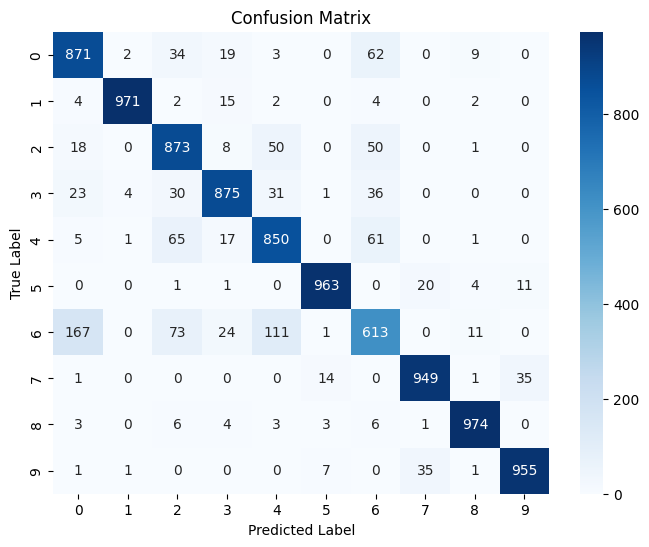

In [36]:
# Step 9: Generate predictions on the test data
y_pred = model.predict(x_test)

# Step 10: Convert predictions from one-hot encoding to integer labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Step 11: Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Step 12: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

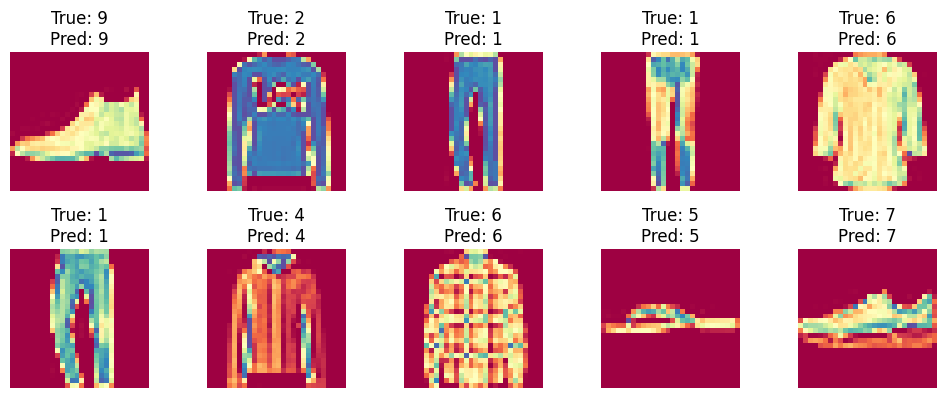

In [70]:

# Step 10: Plot some sample detections
num_samples = 10  # Number of samples to display
plt.figure(figsize=(10, 10))

for i in range(num_samples):
    plt.subplot(5, 5, i+1)
    
    # Display the image
    plt.imshow(x_test[i].reshape(28, 28), cmap='Spectral')
    
    # Set the title with the true label and predicted label
    plt.title(f"True: {y_true_labels[i]}\nPred: {y_pred_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()